<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2.4**

## Maximum Likelihood Estimation for Random Samples

Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [2]:
# generate an independent variable
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-10.086000
1,-9.595960,-24.809781
2,-9.191919,-22.285857
3,-8.787879,-11.719162
4,-8.383838,-13.115681


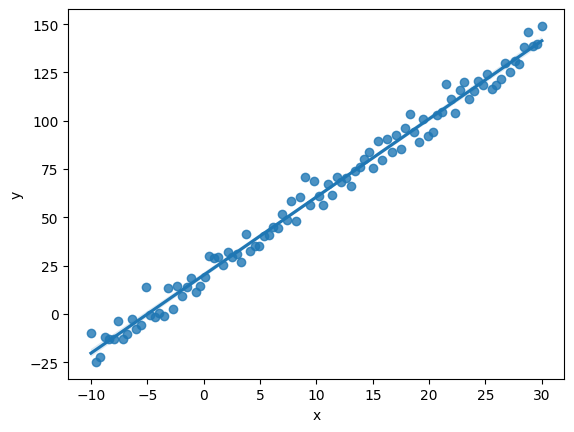

In [3]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [4]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
  # extract parameters
  const, beta, std_dev = parameters
  # predict the output
  pred = const + beta*x
  # Calculate the log-likelihood for normal distribution
  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  # Calculate the negative log-likelihood
  neg_LL = -1*LL
  return neg_LL

In [5]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 306.0092634095733
        x: [ 2.015e+01  4.042e+00  5.161e+00]
      nit: 28
      jac: [-1.705e-05  2.331e-04 -7.958e-05]
     nfev: 128
     njev: 32
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

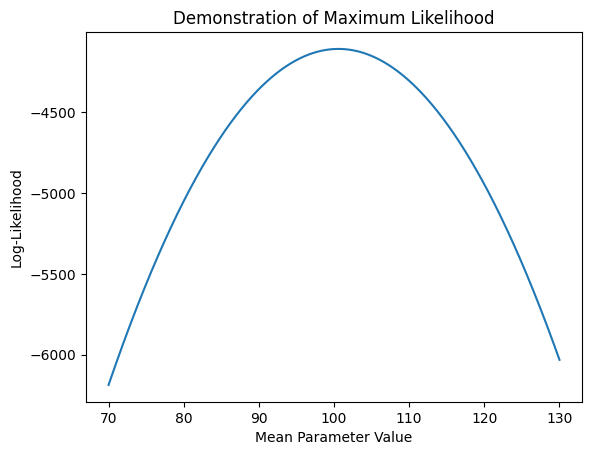

In [8]:
from scipy.stats import norm
from scipy.optimize import minimize

# normally distributed with a mean of 100, and a standard deviation of 15. We will generate 1000 observations
data = norm.rvs(loc=100,scale=15,size=1000,random_state=1)

# write a function that takes in parameters and data, and spits out likelihoods
def likelihood(params,data):
  return norm.logpdf(data,loc=params[0],scale=params[1]).sum()

x = np.linspace(70,130,1000)
y = [likelihood([val,15],data) for val in x]

plt.plot(x,y)
plt.title('Demonstration of Maximum Likelihood')
plt.ylabel('Log-Likelihood')
plt.xlabel('Mean Parameter Value')
plt.show()

## Linear Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5

x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1 * x + e
y_cond_exp = beta_0 + beta_1 * x

# Fit the data
#y_mdl = sm.OLS(y, sm.add_constant(x)).fit()
# Plot the density at specified X axis points:
plot_at = [-5, 0, 5]

In [11]:
from scipy.stats import norm

def sideways_dnorm(where_x, where_y, e_var, magnify = 4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate density for this interval
    # Y|X ~ Normal(XB, sigma^2)
    # (Y - XB)|X ~ Normal(0, sigma^2)
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens * np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))

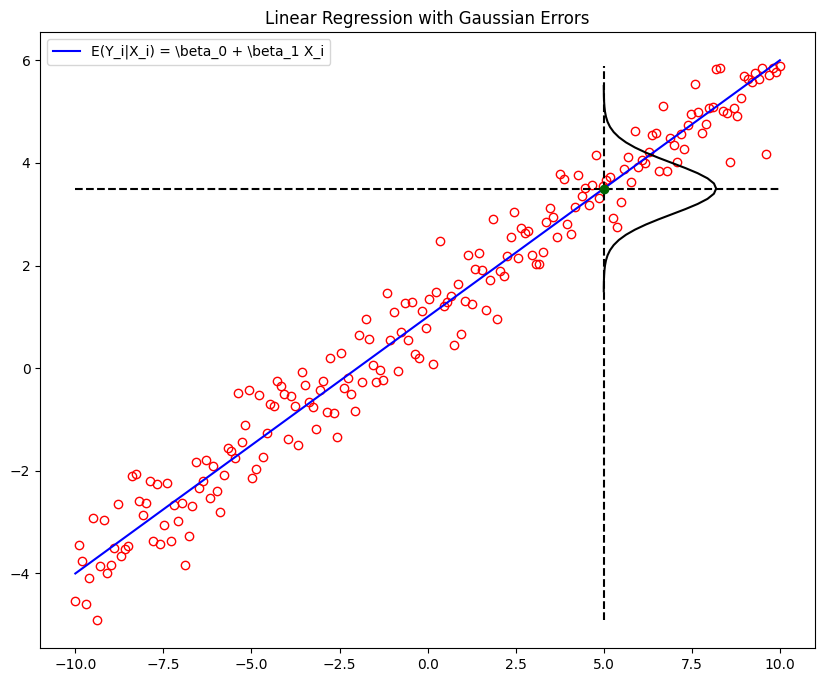

In [13]:
plt.figure(num = 4, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o",
         color = "red", markerfacecolor = 'None')
plt.title("Linear Regression with Gaussian Errors")
#plt.plot(x, y_mdl.fittedvalues, linestyle = "-", color = "blue")
plt.plot(x, y_cond_exp, linestyle = "-", color = "blue",
        label = "E(Y_i|X_i) = \\beta_0 + \\beta_1 X_i")
for i in range(0, len(plot_at)):
    # y_fit = y_mdl.params[0] + y_mdl.params[1] * plot_at[i]
    y_fit = beta_0 + beta_1 * plot_at[i]
    xy = sideways_dnorm(where_x = plot_at[i],
                       where_y = y_fit,
                       e_var = e_sd**2,#np.var(y_mdl.resid),
                       magnify = 4)
plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
plt.hlines(y = y_fit, linestyle = "--",
               color = "black", xmin = min(x), xmax = max(x))
plt.vlines(x = plot_at[i], linestyle = "--",
                color = "black", ymin = min(y), ymax = max(y))
plt.plot(plot_at[i], y_fit, linestyle = "None",
             marker = "o", color = "darkgreen")
plt.legend()
plt.show()